### Association Rule Mining

Goal - Find out products which are bought together frequently

Install apyori package

In [1]:
%pip install apyori

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=99024779c5889ffca3a5c99eca5023520080e4e4a41a850bf4d31d444034080a
  Stored in directory: c:\users\shend\appdata\local\pip\cache\wheels\77\3d\a6\d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori
Note: you may need to restart the kernel to use updated packages.


In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

Read the store data as text

In [3]:
with open('store_data.csv', 'r') as file:
    lines = file.readlines()

In [4]:
lines[0:5]

['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil\n',
 'burgers,meatballs,eggs\n',
 'chutney\n',
 'turkey,avocado\n',
 'mineral water,milk,energy bar,whole wheat rice,green tea\n']

In [5]:
a = lines[0].strip()
a

'shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil'

In [6]:
a.split(',')

['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach',
 'olive oil']

In [7]:
records = []
for i in lines:
    a = i.strip(',')
    cart = a.split(',')
    records.append(cart)

In [8]:
records[0:5]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil\n'],
 ['burgers', 'meatballs', 'eggs\n'],
 ['chutney\n'],
 ['turkey', 'avocado\n'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea\n']]

In [9]:
len(records)

7501

Data extraction completed

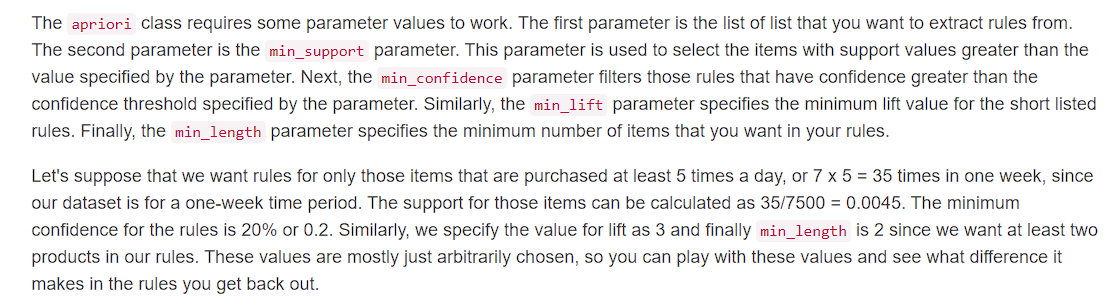

In [10]:
sup = (7*5)/len(records)
sup

0.004666044527396347

In [11]:
conf = 0.2

In [12]:
lift = 3

In [13]:
from apyori import apriori
association_rules = apriori(records, min_support=sup, min_confidence=conf, min_lift = 3)
association_results = list(association_rules)

In [14]:
association_results

[RelationRecord(items=frozenset({'almonds', 'burgers'}), support=0.005199306759098787, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'burgers'}), confidence=0.2785714285714286, lift=3.30104942450914)]),
 RelationRecord(items=frozenset({'fresh bread', 'green tea\n'}), support=0.004799360085321957, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fresh bread'}), items_add=frozenset({'green tea\n'}), confidence=0.3185840707964602, lift=3.0715926928589306)]),
 RelationRecord(items=frozenset({'frozen vegetables', 'parmesan cheese'}), support=0.005199306759098787, ordered_statistics=[OrderedStatistic(items_base=frozenset({'parmesan cheese'}), items_add=frozenset({'frozen vegetables'}), confidence=0.2765957446808511, lift=3.011240465676435)]),
 RelationRecord(items=frozenset({'low fat yogurt', 'green tea\n'}), support=0.004666044527396347, ordered_statistics=[OrderedStatistic(items_base=frozenset({'low fat yogurt'}), items_add=frozense

In [15]:
association_results[0][0]

frozenset({'almonds', 'burgers'})

In [16]:
freq_bought = []
for i in association_results:
    freq_bought.append(i[0])

In [17]:
freq_bought

[frozenset({'almonds', 'burgers'}),
 frozenset({'fresh bread', 'green tea\n'}),
 frozenset({'frozen vegetables', 'parmesan cheese'}),
 frozenset({'green tea\n', 'low fat yogurt'}),
 frozenset({'ground beef', 'herb & pepper'}),
 frozenset({'ground beef', 'tomato sauce'}),
 frozenset({'olive oil', 'whole wheat pasta'}),
 frozenset({'pasta', 'shrimp'}),
 frozenset({'burgers', 'eggs', 'green tea\n'}),
 frozenset({'burgers', 'french fries', 'green tea\n'}),
 frozenset({'cake', 'french fries', 'mineral water'}),
 frozenset({'chocolate', 'frozen vegetables', 'shrimp'}),
 frozenset({'eggs', 'frozen vegetables', 'milk'}),
 frozenset({'french fries', 'pancakes', 'spaghetti'}),
 frozenset({'frozen vegetables', 'ground beef', 'spaghetti'}),
 frozenset({'frozen vegetables', 'mineral water', 'shrimp'}),
 frozenset({'frozen vegetables', 'mineral water', 'soup'}),
 frozenset({'frozen vegetables', 'olive oil', 'spaghetti'}),
 frozenset({'frozen vegetables', 'shrimp', 'spaghetti'}),
 frozenset({'frozen 

Saving the association results in text file

In [18]:
with open('Results.txt', 'w') as file2:
    for i in association_results:
        file2.write(str(i)+'\n')